### Child mind institute - Detect sleep states

* Exploratory data analysis

In [ ]:
import pandas as pd
import os
import fnmatch
import pyarrow.parquet as pq
import matplotlib as plt

In [ ]:
#link to the google drive. Need to follow the authorization instructions.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Get the path to the data folder

data_files_path=[]
#Path for the image files
path = '/content/drive/My Drive/CMI Sleep/CMI Sleep Data'

#Go through all the files in a directory (probably includes subidirectoies as well?)
for file_name in os.listdir(path):
    if fnmatch.fnmatch(file_name,'*parquet'):
        data_files_path.append(os.path.join(path,file_name))

data_files_path_sorted=sorted(data_files_path)

#Print to make sure
for f in data_files_path_sorted:
    print(f)


/content/drive/My Drive/CMI Sleep/CMI Sleep Data/test_series.parquet
/content/drive/My Drive/CMI Sleep/CMI Sleep Data/train_series.parquet


### If we use pd.read_parquet, it takes long time to load and then crashes.

* not enough memory

In [ ]:
parquet_file = pq.ParquetFile(data_files_path_sorted[1])
#chunk_size = 10000
first_row = 0
table = parquet_file.read_row_group(0)
chunk_df = table.to_pandas(split_blocks = True, self_destruct = True)

In [ ]:
chunk_df.series_id.unique()

array(['038441c925bb'], dtype=object)

In [ ]:
chunk_df.head(20)

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
5,038441c925bb,5,2018-08-14T15:30:25-0400,2.636700,0.0217
6,038441c925bb,6,2018-08-14T15:30:30-0400,2.636700,0.0217
7,038441c925bb,7,2018-08-14T15:30:35-0400,2.636700,0.0218
8,038441c925bb,8,2018-08-14T15:30:40-0400,2.798000,0.0223
9,038441c925bb,9,2018-08-14T15:30:45-0400,3.084700,0.0217


<Axes: >

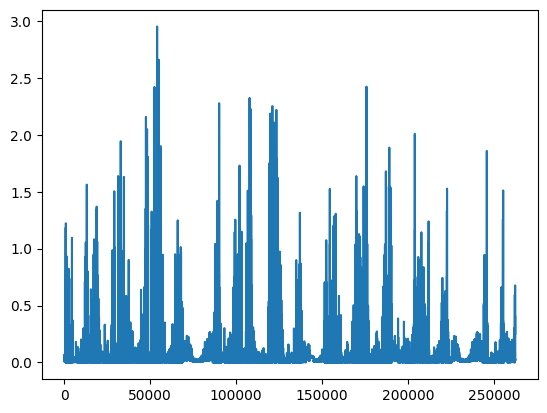

In [ ]:
chunk_df.enmo.plot()

<Axes: >

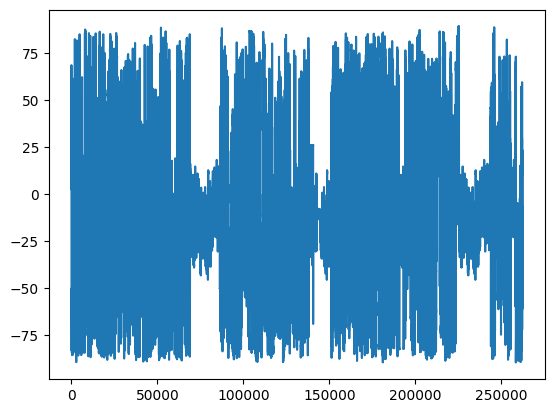

In [ ]:
chunk_df.anglez.plot()

In [ ]:
chunk_df["timestamp"].max()


'2018-08-29T19:38:40-0400'

In [ ]:
chunk_df["timestamp"].min()

'2018-08-14T15:30:00-0400'

In [ ]:
chunk_df["timestamp"] = pd.to_datetime(chunk_df["timestamp"])


In [ ]:
chunk_df["timestamp"].max()-chunk_df["timestamp"].min()

Timedelta('15 days 04:08:40')

<Axes: xlabel='timestamp'>

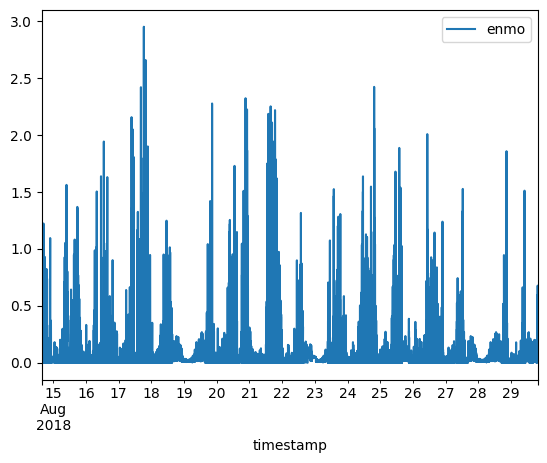

In [ ]:
chunk_df.plot(x='timestamp', y='enmo')



<Axes: xlabel='timestamp'>

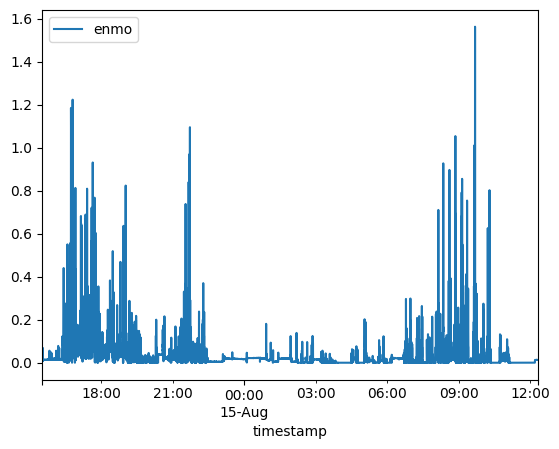

In [ ]:
chunk_df[0:15000].plot(x='timestamp', y='enmo')

In [ ]:
### Instead of
### df = pd. read_parquet(data_files_path_sorted[0])

#try reading 1000 rows at a time with
parquet_file = pq.ParquetFile(data_files_path_sorted[1])
for i in parquet_file.iter_batches(batch_size=1000):
    print("RecordBatch")
    print(i.to_pandas())

Streaming output truncated to the last 5000 lines.
999  062dbd4c95e6  109859  2018-08-28T20:49:55-0400  18.326300  0.0153

[1000 rows x 5 columns]
RecordBatch
        series_id    step                 timestamp   anglez    enmo
0    062dbd4c95e6  109860  2018-08-28T20:50:00-0400  16.6073  0.0442
1    062dbd4c95e6  109861  2018-08-28T20:50:05-0400  10.3526  0.0275
2    062dbd4c95e6  109862  2018-08-28T20:50:10-0400  11.5985  0.0181
3    062dbd4c95e6  109863  2018-08-28T20:50:15-0400   8.3813  0.0102
4    062dbd4c95e6  109864  2018-08-28T20:50:20-0400   7.5371  0.1164
..            ...     ...                       ...      ...     ...
995  062dbd4c95e6  110855  2018-08-28T22:12:55-0400 -81.7314  0.0000
996  062dbd4c95e6  110856  2018-08-28T22:13:00-0400 -81.7314  0.0000
997  062dbd4c95e6  110857  2018-08-28T22:13:05-0400 -81.7314  0.0000
998  062dbd4c95e6  110858  2018-08-28T22:13:10-0400 -81.7314  0.0000
999  062dbd4c95e6  110859  2018-08-28T22:13:15-0400 -81.7314  0.0000

[1000 rows x

KeyboardInterrupt: ignored

<Axes: >

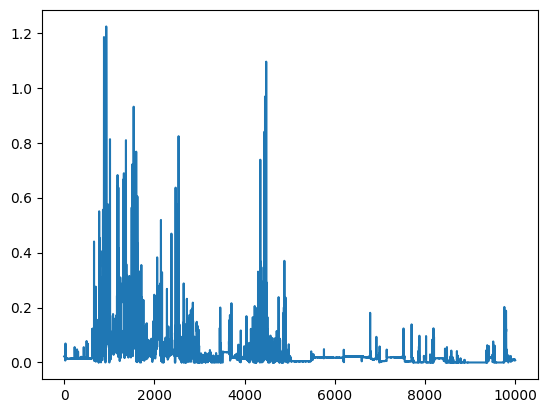

In [ ]:
chunk_df.enmo[0:10000].plot()

<Axes: >

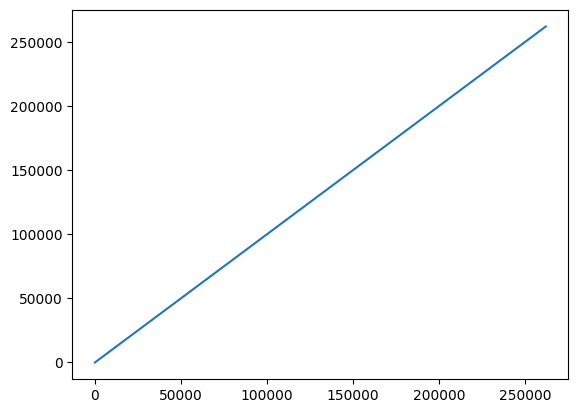

In [ ]:
chunk_df.step.plot()

In [ ]:
parquet_file = pq.ParquetFile(data_files_path_sorted[1])
chunk_size = 10000
first_row = 0
table = parquet_file.read_row_group(chunk_size)
chunk_df = table.to_pandas(split_blocks = True, self_destruct = True)


# 1st option
""" The `num_row_groups` property determines
the number of chunks, and you can adjust the `chunk_size` as needed."""
for i in range(0, parquet_file.num_row_groups, chunk_size):
    table = parquet_file.read_row_group(i, i + chunk_size)
    # Process the chunk (table)
    # Joining data with another small file dataframe
    chunk_df = table.to_pandas(split_blocks=True, self_destruct=True)
    chunk_df = chunk_df.merge(small_file_df, on=join_columns, how=join_type,
                            suffixes=('_left', '_right')
# 2nd option
""" `iter_batches` property iterate over parquet file data based
on chunk-size provided. """
for batch in parquet_file.iter_batches(batch_size=chunk_size):
    # Process the chunk (batch)
    # Joining data with another small file dataframe
    chunk_df = pa.Table.from_batches([batch]).\
        to_pandas(split_blocks=True, self_destruct=True)
    chunk_df = chunk_df.merge(small_file_df, on=join_columns, how=join_type,
                            suffixes=('_left', '_right')

SyntaxError: ignored